# Lab - 8

Name: Purusharth Malik

Registration No.: 2348542

### Implementation of the Deutsch-Jozsa problem

In [3]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit_aer import AerSimulator

### Show the quantum circuit implementation of the query gate.

In [4]:
def dj_function(num_qubits):
    qc = QuantumCircuit(num_qubits + 1)
    is_constant = np.random.randint(0, 2)
    if is_constant:
        if np.random.randint(0, 2):
            qc.x(num_qubits)
        return qc, True
    else:
        all_states = np.arange(2 ** num_qubits)
        on_states = np.random.choice(all_states, size=2 ** (num_qubits - 1), replace=False)
        def add_cx(qc, bit_string):
            for qubit, bit in enumerate(reversed(bit_string)):
                if bit == '0':
                    qc.x(qubit)
            qc.mcx(list(range(num_qubits)), num_qubits)
            for qubit, bit in enumerate(reversed(bit_string)):
                if bit == '0':
                    qc.x(qubit)
            return qc
        for state in on_states:
            qc.barrier() 
            bit_string = f"{state:0{num_qubits}b}"
            qc = add_cx(qc, bit_string)
        qc.barrier()
        return qc, False

### Create the Deutsch-Jozsa circuit, taking a quantum circuit implementation of a query gate as an argument

In [5]:
def deutsch_jozsa_circuit(function: QuantumCircuit):
    n = function.num_qubits - 1 
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)  
    qc.h(range(n + 1)) 
    qc.compose(function, inplace=True)  
    qc.h(range(n))  
    qc.measure(range(n), range(n))  
    return qc

### Test your implementation by choosing a function randomly, displaying the quantum circuit implementation of a query gate for this function, and then running the Deutsch-Jozsa algorithm on that function.

In [6]:
num_qubits = 3
oracle, is_constant = dj_function(num_qubits)

print(f"The function is {'constant' if is_constant else 'balanced'}.")

The function is balanced.


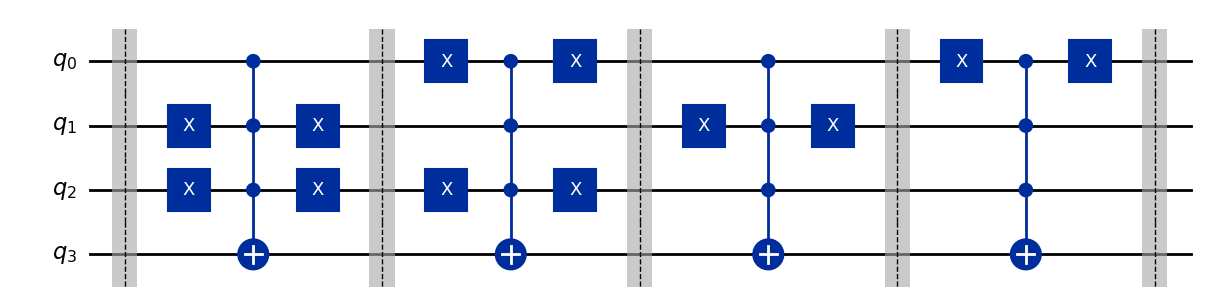

In [7]:
oracle.draw('mpl')

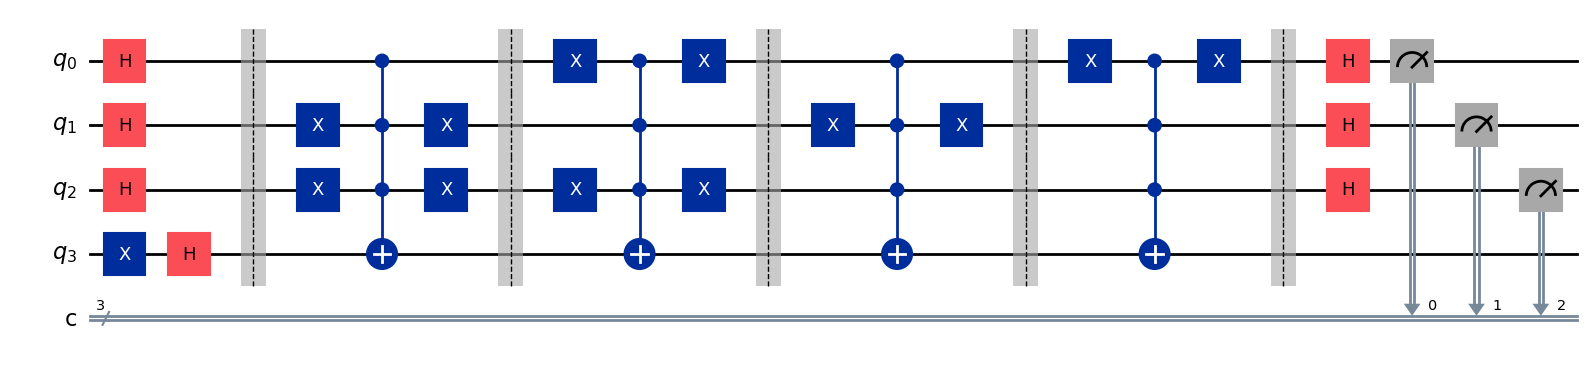

In [8]:
dj_circuit = deutsch_jozsa_circuit(oracle)
dj_circuit.draw('mpl')

In [9]:
simulator = AerSimulator()
result = simulator.run(dj_circuit, shots=1, memory=True).result()

measurements = result.get_memory()
print(f"Measurement result: {measurements[0]}")

Measurement result: 011


In [10]:
if '0' * num_qubits == measurements[0]:
    print("The Deutsch-Jozsa algorithm determined that the function is constant.")
else:
    print("The Deutsch-Jozsa algorithm determined that the function is balanced.")

The Deutsch-Jozsa algorithm determined that the function is balanced.


In [11]:
if is_constant:
    print("The function is actually constant.")
else:
    print("The function is actually balanced.")

The function is actually balanced.


# End